### Find the Investors who have invested maximum number of times.
#### Print the investor name and number of times invested as integer value.
#### Note: In startup, multiple investors might have invested. So consider each investor for that startup.

In [1]:

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


with open('startup_funding.csv', encoding='utf8') as file_obj:
    file_data=csv.DictReader(file_obj, skipinitialspace=True)
    investors=[]
    for row in file_data:
        if not ('Undisclosed' in row['InvestorsName'] or 'undisclosed' in row['InvestorsName']):
            for i in row['InvestorsName'].split(','):
                investors.append(i.strip())
    dic=dict()
    for i in investors:
        if i in dic.keys():
            dic[i]+=1
        else:
            dic[i]=1
    x=[]
    y=[]
    for i in dic.keys():
        x.append(i)
        y.append(dic[i])
    np_x=np.array(x)
    np_y=np.array(y)
    np_x=np_x[np.argsort(np_y)]
    np_y=np.sort(np_y)
    
    np_y=np_y[::-1]
    np_x=np_x[::-1]
    print(np_x[0], np_y[0])

Sequoia Capital 64


#### Check the trend of investments over the years. To check the trend, find -
#### Total number of fundings done in each year.
#### Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.
#### Print year-wise total number of fundings also. Print years in ascending order.
#### Note : There is some error in the 'Date' feature. Make sure to handle that.

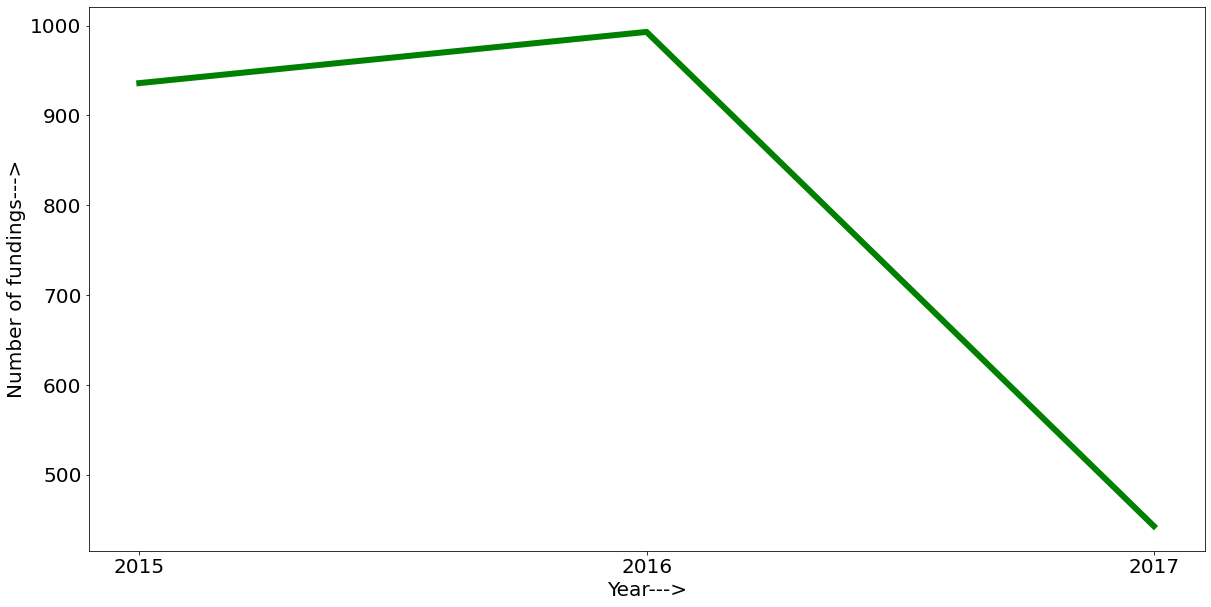

2015 936
2016 993
2017 443


In [2]:

import numpy as np
import matplotlib.pyplot as plt
import csv

with open('startup_funding.csv', encoding='utf8') as file_obj:
    file_data=csv.DictReader(file_obj, skipinitialspace=True)
    year=[]
    for row in file_data:
        year.append(row['Date'][len(row['Date'])-4:])
    np_year=np.array(year, dtype='int')
    dic=dict()
    for i in np_year:
        if i in dic.keys():
            dic[i]+=1
        else:
            dic[i]=1
    xaxis=[]
    yaxis=[]
    for i in dic.keys():
        xaxis.append(i)
        yaxis.append(dic[i])
    xaxis=xaxis[::-1]
    yaxis=yaxis[::-1]
    plt.subplots(figsize=(20, 10))
    plt.plot(xaxis, yaxis, color='green', linewidth=6)
    plt.xticks(xaxis)
    plt.xlabel('Year--->', size=20)
    plt.ylabel('Number of fundings--->', size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
    for i in range(len(xaxis)):
        print(xaxis[i], yaxis[i])

#### Find out which cities are generally chosen for starting a startup.
#### Find top 10 Indian cities which have most number of startups ?
#### Plot a pie chart and visualise it.
#### Print the city name and number of startups in that city also.
#### Note : Take city name "Delhi" as "New Delhi".Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.
#### Print the city in descending order with respect to the number of startups.

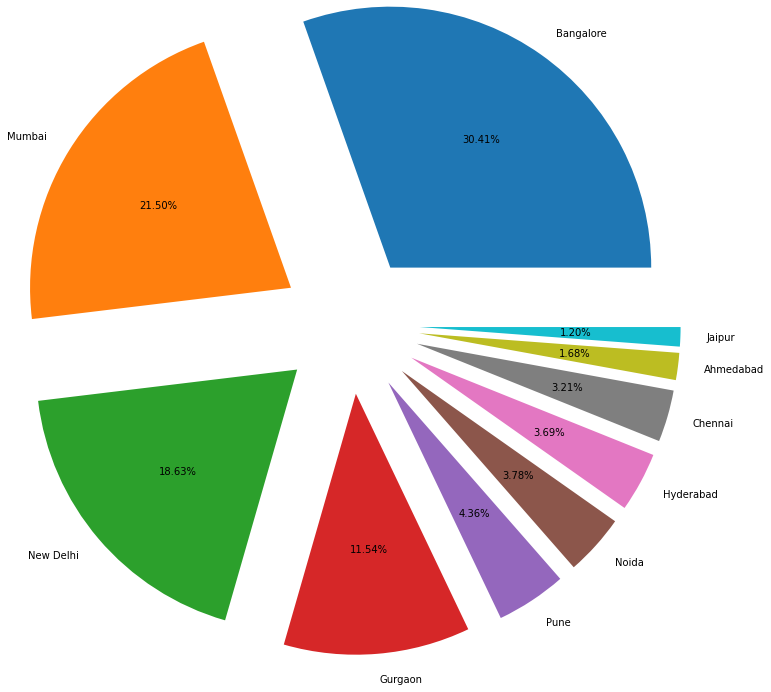

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [3]:

import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd



with open('startup_funding.csv', encoding='utf8') as file_obj:
    file_data=csv.DictReader(file_obj, skipinitialspace=True)
    city=[]
    for row in file_data:
        city.append(row['CityLocation'])
    np_city=np.array(city)
    np_city=np_city[np_city != '']
    
    for i in range(len(np_city)):
        if 'bangalore' in np_city[i]:
            np_city[i]='Bangalore'
        if np_city[i]=='Delhi':
            np_city[i]='New Delhi'
    
    for i in range(len(np_city)) :
        np_city[i]=np_city[i].split('/')[0].strip()
    
    dic=dict()
    for i in np_city:
        if i in dic.keys():
            dic[i]+=1
        else:
            dic[i]=1
    
    xaxis=[]
    yaxis=[]
    
    for i in dic.keys():
        xaxis.append(i)
        yaxis.append(dic[i])
    np_xaxis=np.array(xaxis)
    np_yaxis=np.array(yaxis)
    
    np_xaxis=np_xaxis[np.argsort(np_yaxis)]
    np_yaxis=np.sort(np_yaxis)
    
    np_xaxis=np_xaxis[len(np_xaxis)-1:len(np_xaxis)-1-10:-1]
    np_yaxis=np_yaxis[len(np_yaxis)-1:len(np_yaxis)-1-10:-1]

    plt.pie(np_yaxis, labels=np_xaxis, autopct='%.2f%%', radius=3, explode=[0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8])
    plt.show()
    
    for i in range(len(np_xaxis)):
        print(np_xaxis[i], np_yaxis[i])

#### Find out if cities play any role in receiving funding.
#### Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).
#### Print the city and percentage with 2 decimal place after rounding off.
#### Note: Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.
#### Print the city in descending order with respect to the percentage of funding.

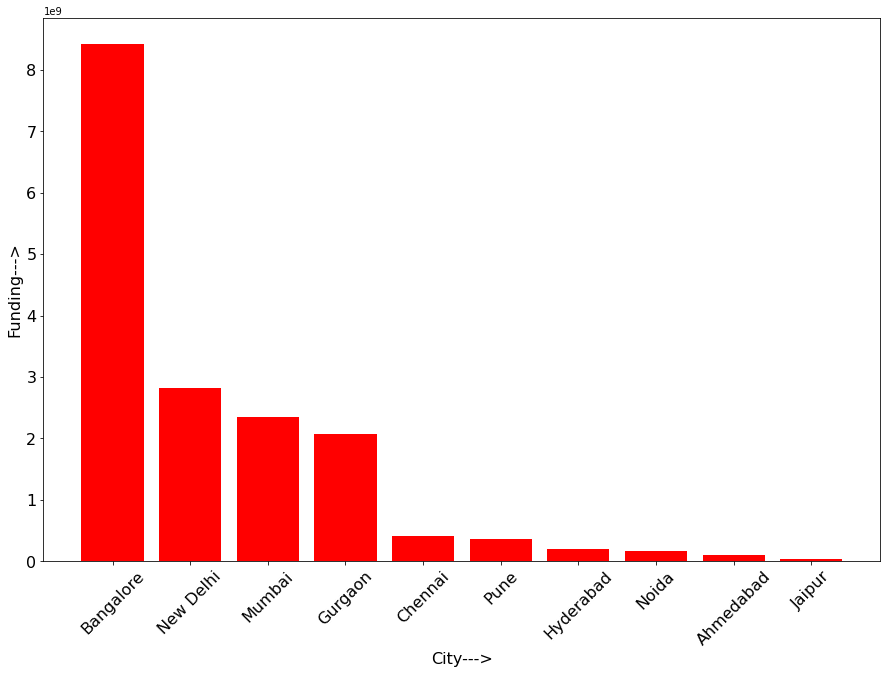

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


In [4]:


import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
data=pd.read_csv('startup_funding.csv')
df=data.copy()
df.drop(df.index[df.CityLocation.isnull()], inplace=True)
df.reset_index(inplace=True, drop=True)
df.loc[df['AmountInUSD'].isnull(), 'AmountInUSD']='0'
df.loc[df.CityLocation=='bangalore','CityLocation']='Bangalore'
df.loc[df.CityLocation=='Delhi', 'CityLocation']='New Delhi'
city=[]
amount=[]
for i in df.CityLocation:
    city.append(i)
for i in df.AmountInUSD:
    amount.append(i)

for i in range(len(amount)):
    amount[i]=''.join(amount[i].split(','))
    city[i]=city[i].split('/')[0].strip()
np_amount=np.array(amount, dtype='int64')
np_city=np.array(city)



dic=dict()
for i in range(len(np_city)):
    if np_city[i] in dic:
        dic[np_city[i]]+=np_amount[i]
    else:
        dic[np_city[i]]=np_amount[i]
xaxis=list(dic.keys())
yaxis=list(dic.values())

np_xaxis=np.array(xaxis)
np_yaxis=np.array(yaxis)

np_xaxis=np_xaxis[np.argsort(np_yaxis)]
np_yaxis=np.sort(np_yaxis)

np_xaxis=np_xaxis[len(np_xaxis)-1:len(np_xaxis)-1-10:-1]
np_yaxis=np_yaxis[len(np_yaxis)-1:len(np_yaxis)-1-10:-1]

plt.subplots(figsize=(15, 10))
plt.bar(np_xaxis, np_yaxis, color='red')
plt.xticks(rotation=45, size=16)
plt.yticks(size=16)
plt.xlabel('City--->', size=16)
plt.ylabel('Funding--->', size=16)
plt.show()

for i in range(len(np_xaxis)):
    print(np_xaxis[i], format((np_yaxis[i]*100)/sum(np_yaxis), '.2f'))

#### There are 4 different type of investments. Find out percentage of amount funded for each investment type.
#### Plot a pie chart to visualise.
#### Print the investment type and percentage of amount funded with 2 decimal places after rounding off.
#### Note : Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.
#### Print the investment type in descending order with respect to the percentage of the amount funded.

C:\anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


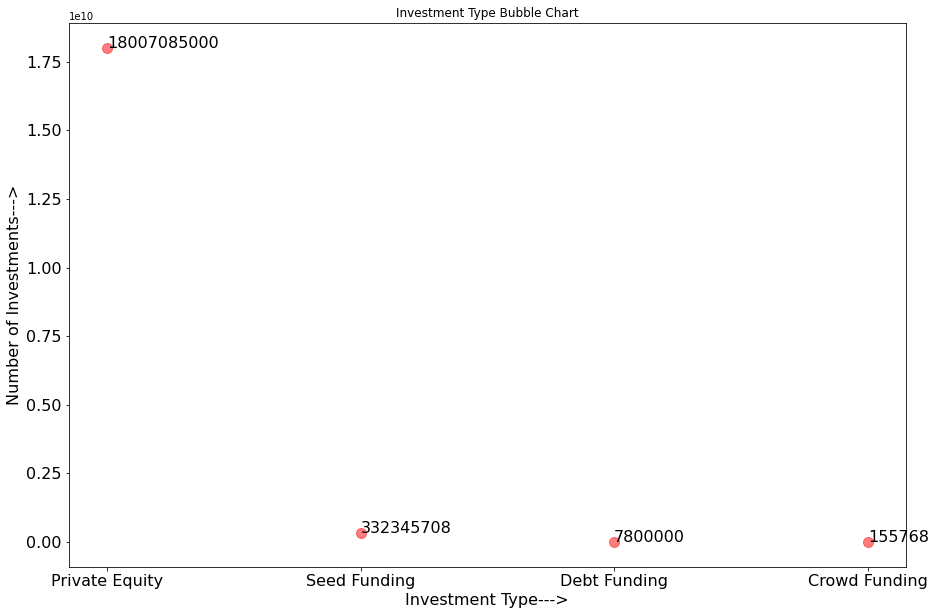

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


In [5]:


import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

original_data=pd.read_csv('startup_funding.csv', encoding='utf8')
df=original_data.copy()
df.AmountInUSD.fillna('0', inplace=True)
df.InvestmentType.loc[df.InvestmentType=='Crowd funding']='Crowd Funding'
df.InvestmentType.loc[df.InvestmentType=='PrivateEquity']='Private Equity'
df.InvestmentType.loc[df.InvestmentType=='SeedFunding']='Seed Funding'


np_seed_funding=np.array(df.AmountInUSD[df.InvestmentType=='Seed Funding'])
for i in range(len(np_seed_funding)):
    np_seed_funding[i]=''.join(np_seed_funding[i].split(','))
np_seed_funding=np.array(np_seed_funding, dtype='int64')


np_Crowd_Funding=np.array(df.AmountInUSD[df.InvestmentType=='Crowd Funding'])
for i in range(len(np_Crowd_Funding)):
    np_Crowd_Funding[i]=''.join(np_Crowd_Funding[i].split(','))
np_Crowd_Funding=np.array(np_Crowd_Funding, dtype='int64')


np_Debt_Funding=np.array(df.AmountInUSD[df.InvestmentType=='Debt Funding'])
for i in range(len(np_Debt_Funding)):
    np_Debt_Funding[i]=''.join(np_Debt_Funding[i].split(','))
np_Debt_Funding=np.array(np_Debt_Funding, dtype='int64')


np_Private_Equity=np.array(df.AmountInUSD[df.InvestmentType=='Private Equity'])
for i in range(len(np_Private_Equity)):
    np_Private_Equity[i]=''.join(np_Private_Equity[i].split(','))
np_Private_Equity=np.array(np_Private_Equity, dtype='int64')

private=sum(np_Private_Equity)
crowd=sum(np_Crowd_Funding)
debt=sum(np_Debt_Funding)
seed=sum(np_seed_funding)
xaxis=['Private Equity', 'Seed Funding', 'Debt Funding', 'Crowd Funding']
yaxis=[private, seed, debt, crowd]

plt.subplots(figsize=(15, 10))
plt.scatter(xaxis, yaxis, s=100, color='red', alpha=0.5)
plt.xticks(size=16)
plt.yticks(size=16)
plt.xlabel('Investment Type--->', size=16)
plt.ylabel('Number of Investments--->', size=16)
plt.title('Investment Type Bubble Chart')
for i in range(len(xaxis)):
    plt.text(xaxis[i], yaxis[i], yaxis[i], size=16)
plt.show()

for i in range(len(xaxis)):
    print(xaxis[i],format((yaxis[i]*100)/sum(yaxis), '.2f'))



####  Which type of companies got more easily funding. To answer this question, find -
#### Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)
#### Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.
#### Note : Ecommerce is the right word in IndustryVertical, so correct it.
#### Print the industry in descending order with respect to the percentage of the amount funded.

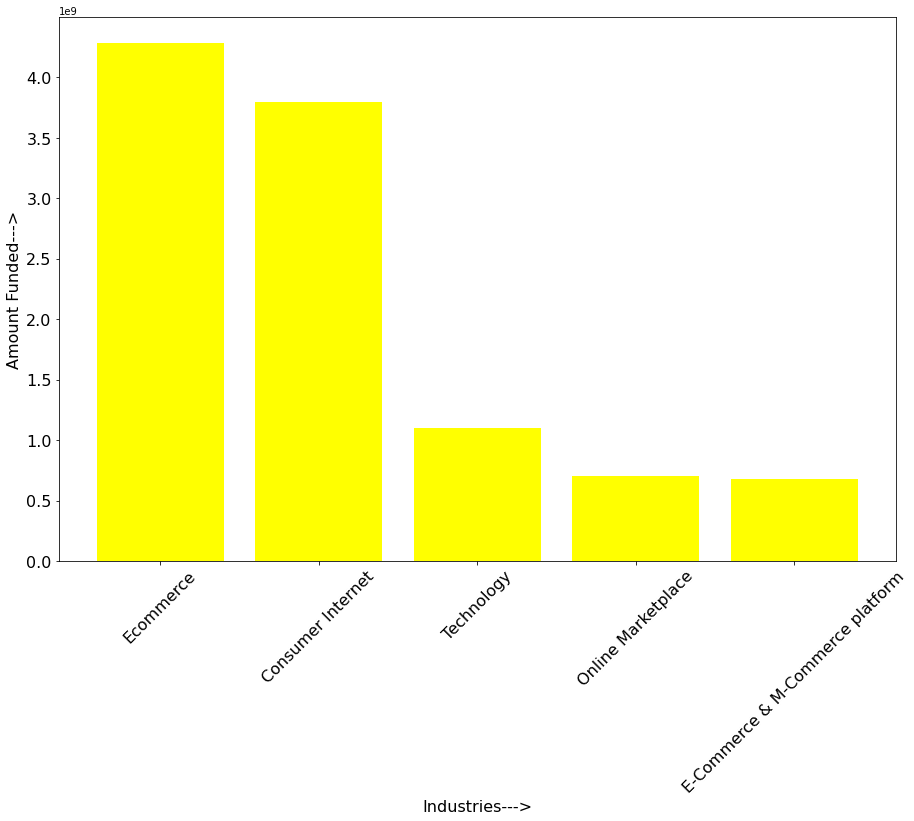

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


In [6]:

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('startup_funding.csv')
df=data.copy()
df.AmountInUSD.loc[df['AmountInUSD'].isnull()]='0'
df.drop(df['SNo'].loc[df.IndustryVertical.isnull()], inplace=True)

np_industry=np.array(df.IndustryVertical)
np_amount=np.array(df.AmountInUSD)
np_industry[np_industry=='eCommerce']='Ecommerce'
np_industry[np_industry=='ECommerce']='Ecommerce'
np_industry[np_industry=='ecommerce']='Ecommerce'

for i in range(len(np_amount)):
    np_amount[i]=''.join(np_amount[i].split(','))
np_amount=np.array(np_amount, dtype='int64')

dic=dict()
for i in range(len(np_amount)):
    if np_industry[i] in dic.keys():
        dic[np_industry[i]]+=np_amount[i]
    else:
        dic[np_industry[i]]=np_amount[i]
xaxis=[]
yaxis=[]

for i in dic.keys():
    xaxis.append(i)
    yaxis.append(dic[i])
np_xaxis=np.array(xaxis)
np_yaxis=np.array(yaxis)

np_xaxis=np_xaxis[np.argsort(np_yaxis)]
np_yaxis=np.sort(np_yaxis)

np_xaxis=np_xaxis[len(np_xaxis)-1:len(np_xaxis)-1-5:-1]
np_yaxis=np_yaxis[len(np_yaxis)-1:len(np_yaxis)-1-5:-1]

plt.subplots(figsize=(15, 10))
plt.bar(np_xaxis, np_yaxis, color='yellow')
plt.xticks(rotation=45, size=16)
plt.xlabel('Industries--->', size=16)
plt.ylabel('Amount Funded--->', size=16)
plt.yticks(size=16)
plt.show()

for i in range(len(np_xaxis)):
    print(np_xaxis[i], format((np_yaxis[i]*100)/sum(np_yaxis) , '.2f'))

#### Find top 5 startups with most amount of total funding.
#### Print the startup name in descending order with respect to amount of funding.
#### Note: Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.

In [7]:

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('startup_funding.csv')
df=data.copy()
df.AmountInUSD.loc[df['AmountInUSD'].isnull()]='0'

np_amount=np.array(df.AmountInUSD)
np_startup=np.array(df.StartupName)

for i in range(len(np_amount)):
    np_amount[i]=''.join(np_amount[i].split(','))
np_amount=np.array(np_amount, dtype='int64')
for i in range(len(np_startup)):
    if 'Ola' in np_startup[i]:
        np_startup[i]='Ola'
    if 'Flipkart' in np_startup[i]:
        np_startup[i]='Flipkart'
    if 'Oyo' in np_startup[i]:
        np_startup[i]='Oyo'
    if 'Paytm' in np_startup[i]:
        np_startup[i]='Paytm'
dic=dict()
for i in range(len(np_amount)):
    if np_startup[i] in dic.keys():
        dic[np_startup[i]]+=np_amount[i]
    else:
        dic[np_startup[i]]=np_amount[i]
        
xaxis=[]
yaxis=[]
for i in dic.keys():
    xaxis.append(i)
    yaxis.append(dic[i])
np_xaxis=np.array(xaxis)
np_yaxis=np.array(yaxis)

np_xaxis=np_xaxis[np.argsort(np_yaxis)]
np_yaxis=np.sort(np_yaxis)

np_xaxis=np_xaxis[len(np_xaxis)-1:len(np_xaxis)-1-5:-1]
np_yaxis=np_yaxis[len(np_yaxis)-1:len(np_yaxis)-1-5:-1]

for i in np_xaxis:
    print(i)

Paytm
Flipkart
Ola
Snapdeal
Oyo


#### Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.
#### Print the startup name in descending order with respect to the number of funding round as integer value.
#### Note: Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.

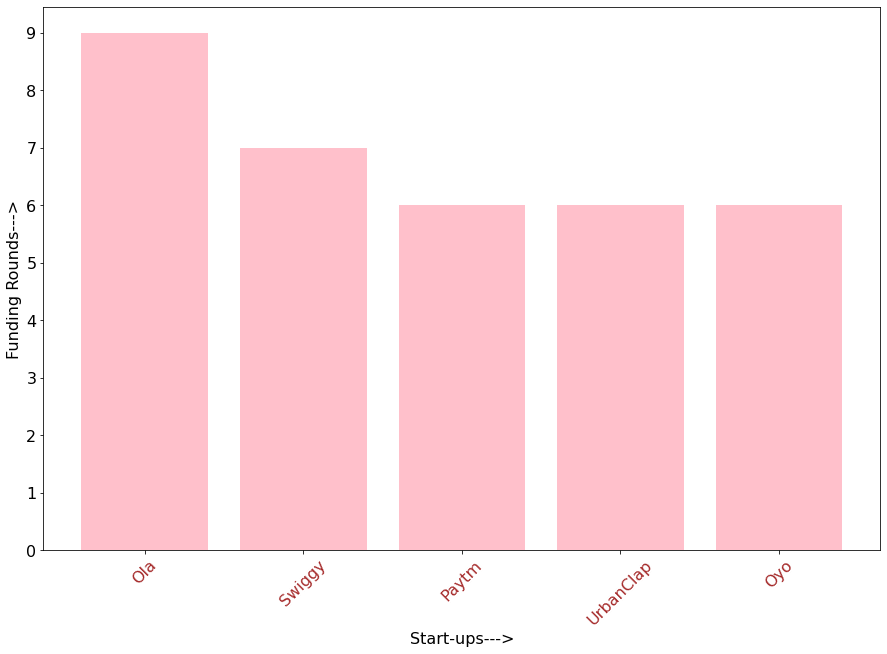

Ola 9
Swiggy 7
Paytm 6
UrbanClap 6
Oyo 6


In [8]:

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('startup_funding.csv')
df=data.copy()
np_startup=np.array(df.StartupName)

for i in range(len(np_startup)):
    if 'Ola' in np_startup[i]:
        np_startup[i]='Ola'
    if 'Flipkart' in np_startup[i]:
        np_startup[i]='Flipkart'
    if 'Oyo' in np_startup[i] or 'OYO Rooms' in np_startup[i]:
        np_startup[i]='Oyo'
    if 'Paytm' in np_startup[i]:
        np_startup[i]='Paytm'

dic=dict()
for i in np_startup:
    if i in dic.keys():
        dic[i]+=1
    else:
        dic[i]=1
x=[]
y=[]
for i in dic.keys():
    x.append(i)
    y.append(dic[i])
np_x=np.array(x)
np_y=np.array(y)
np_x=np_x[np.argsort(np_y)]
np_y=np.sort(np_y)
np_x=np_x[len(np_x)-1:len(np_x)-1-5:-1]
np_y=np_y[len(np_y)-1:len(np_y)-1-5:-1]

plt.subplots(figsize=(15, 10))
plt.bar(np_x, np_y, color='pink')
plt.xticks(size=16, rotation=45, color='brown')
plt.yticks(np.arange(0, 10), size=16)
plt.xlabel('Start-ups--->', size=16)
plt.ylabel('Funding Rounds--->', size=16)
plt.show()
for i in range(len(np_x)):
    print(np_x[i], np_y[i])